<a href="https://colab.research.google.com/github/gnanithag5/Assignments-Maters/blob/main/ML_ASSIGNMENT_6_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np #numerical tools
import scipy.signal as sp #signal processing tools
import matplotlib.pyplot as plt

def data(N,a):
   N=N+3
   h=np.array([1,a])
   y=np.sign(np.random.randn(N,))
   y=np.reshape(y,len(y))
   t=np.arange(N)
   z=np.convolve(h,y)
   z=z[1:N-1]
   y=y[2:N-1]
   X=np.array([z[0:N-3],z[1:N-2]])+0.2*np.random.randn(2,N-3)
   return X,y

In [ ]:
X,Y=data(100,0.2)
theta = np.pi/2
R=np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])
# u=X[:,0:2]
# trans=(R*u.T).T
# X[:,0]=u[:,0]
# X[:,1]=u[:,1]
ind1=np.where(Y==1)
ind2=np.where(Y==-1)


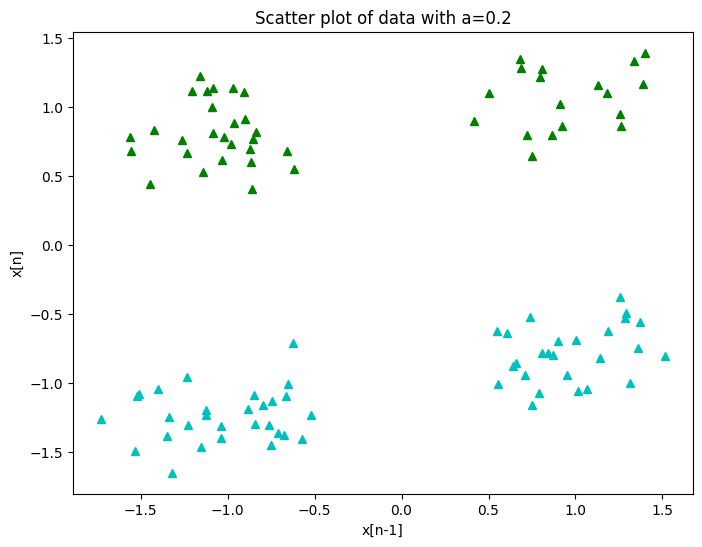

In [ ]:
fig, ax1 = plt.subplots(figsize=[8,6])
ax1.plot(X[0,ind1],X[1,ind1],'g^')
ax1.plot(X[0,ind2],X[1,ind2],'c^')
ax1.set_xlabel('x[n-1]')
ax1.set_ylabel('x[n]')
plt.title("Scatter plot of data with a=0.2")
plt.show()

100
100


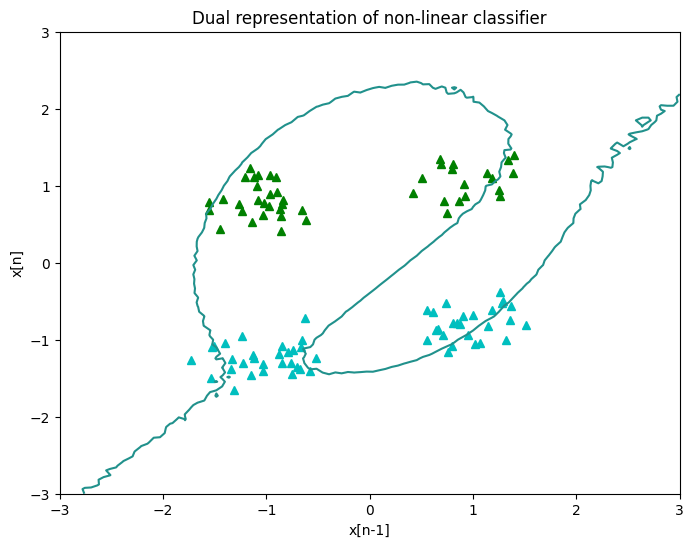

In [ ]:
fig, ax2 = plt.subplots(figsize=[8,6])
ax2.plot(X[0,ind1],X[1,ind1],'g^')
ax2.plot(X[0,ind2],X[1,ind2],'c^')
ax2.set_xlabel('x[n-1]')
ax2.set_ylabel('x[n]')

if True:
#Train
 K=(np.matmul(X.T,X)+1)**3
 print(len(K))
 alpha=np.matmul(np.linalg.inv(np.matmul(K.T,K)),Y.T) ##dual
 print(len(alpha))
 gamma=0.1
 # alpha=np.matmul(inv(K+gamma*np.eye(len(X[1]))),y.T)   ##Ridge regression
 y_train=np.matmul(alpha.T,K)

if True:
#Test\n",
 [x,y]= np.meshgrid(np.linspace(-3,3,100), np.linspace(-3,3,100))
 x1, x2 = np.ravel(x.reshape(-1,1).T),np.ravel(y.reshape(-1,1))
 z=np.array((x1,x2))
 k_test=(np.matmul(X.T,z)+1)**3
 y_test=np.matmul(alpha.T,k_test) ## dual
 Z=np.reshape(np.ravel(y_test),(100,100))

plt.contour(x, y, Z,0)
plt.title("Dual representation of non-linear classifier")
plt.show()

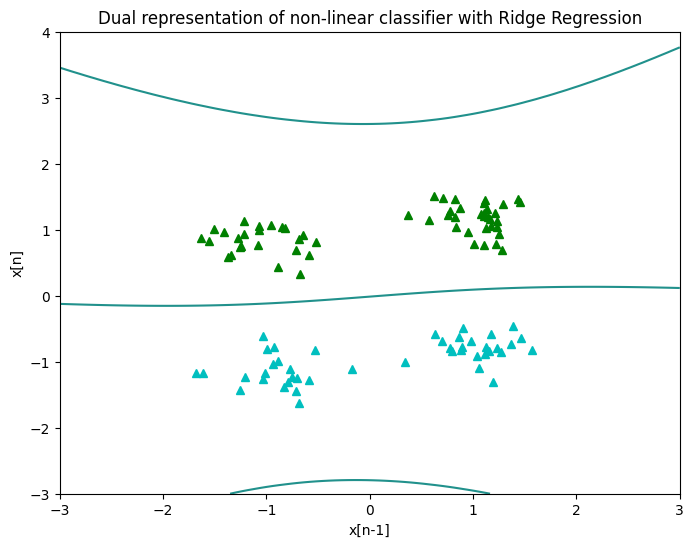

In [ ]:
fig, ax3 = plt.subplots(figsize=[8,6])
ax3.plot(X[0,ind1],X[1,ind1],'g^')
ax3.plot(X[0,ind2],X[1,ind2],'c^')
ax3.set_xlabel('x[n-1]')
ax3.set_ylabel('x[n]')
if True:
    #Train\n",
    K1=(np.matmul(X.T,X)+1)**3
    # alpha=np.matmul(inv(np.matmul(K.T,K)),y.T) ##dual\n",
    gamma=10
    alpha1=np.matmul(np.linalg.inv(K1+gamma*np.eye(len(X[1]))),Y.T)   ##Ridge regression\n",
    y_train=np.matmul(alpha1.T,K1)

if True:
    #Test
    [x,y]= np.meshgrid(np.linspace(-3,3,100), np.linspace(-3,4,100))
    x1, x2 = np.ravel(x.reshape(-1,1).T),np.ravel(y.reshape(-1,1))
    z_1=np.array((x1,x2))
    k_test1=(np.matmul(X.T,z_1)+1)**3
    y_test1=np.matmul(alpha1.T,k_test1) ## dual
    Z=np.reshape(np.ravel(y_test1),(100,100))

plt.contour(x, y, Z,0)
plt.title("Dual representation of non-linear classifier with Ridge Regression")
plt.show()